In [7]:
import os
import numpy as np
import pandas as pd
from gensim.models import Word2Vec

from scipy import sparse
from sklearn.decomposition import TruncatedSVD, PCA
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

from tqdm import tqdm

from preprocess import (
    remove_punctuation,
    split_sentences,
    process_suffixes,
    get_suffixes,
)

/home/bibek/.local/share/virtualenvs/nepali-vectors-embedding-Od9eAryh/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [8]:
# CONSTANTS
# CORPUS_PATH = './corpus'
CORPUS_PATH = '/home/bibek/projects/scrapeet/_scraped'
SUFFIXES = get_suffixes()
WORDS_COUNT_FILE = 'words_count.txt'
PAIR_COOCCURENCES_FILE = 'pair_cooccurences.txt'
MIN_COUNT_THRESHOLD = 2  # All the tokens with counts less than or equal to this will be ignored from consideration
CO_OCCURENCE_WINDOW = 4  # Consider window of two words to consider to have "co-occured"

In [9]:
def get_files_recursively(directory):
    files = []
    dirs = os.listdir(directory)
    for d in dirs:
        path = os.path.join(directory, d)
        if os.path.isfile(path):
            files.append(path)
        else:
            files.extend(get_files_recursively(path))
    return files

In [12]:
# GET CORPUS
# content_files = os.listdir(CORPUS_PATH)
content_files = get_files_recursively(CORPUS_PATH)

all_content = []

for filename in tqdm(content_files):
    path = os.path.join(CORPUS_PATH, filename)
    with open(path, 'r') as f:
        f.readline()  # Read and omit the first line
        all_content.append(f.read())

100%|██████████| 228793/228793 [00:08<00:00, 28148.56it/s]


In [14]:
def clean_and_extract_sentences(text):
    clean = remove_punctuation(text)
    sentences = split_sentences(clean)
    sentences_word_list = []
    for sentence in sentences:
        splitted = [x for x in sentence.split() if x]
        suffix_processed = process_suffixes(SUFFIXES, splitted)
        sentences_word_list.append(
            [x for x in suffix_processed if x]
        )
    return sentences_word_list

In [15]:
sentences = []
for content in all_content:
    cleaned_sentences = clean_and_extract_sentences(content)
    sentences.extend(cleaned_sentences)
print(len(sentences))

4487856


In [16]:
# Create and save model
model = Word2Vec(sentences, vector_size=400, workers=8)
model.save('gensim_word2vec.bin')
print('model saved!!')

model saved!!


In [17]:
# Save word indices
with open('gensim_keys.txt', 'w') as f:
    for k in model.wv.index_to_key:
        f.write(f'{k}\n')
print('DONE WRITING')

DONE WRITING


In [66]:
# load model
model = Word2Vec.load('gensim_word2vec.bin')
print('model loaded!!')

model loaded!!


In [18]:
X = model.wv.get_normed_vectors()

['सीसीआरटी', 'भाइरोलोजिष्ट', 'उपराष्ट्र्रपति', 'एमई', 'बङ्गबन्धु', 'कनेक्टिभ', 'भत्किए', 'सचिवः', 'स्टुअर्ड', 'कुर्छौं', 'बर्गाकार', 'दिपकप्रकाश', 'क्षमता', 'नोरा', 'द्वितिया', 'बुढोपन', 'कर्तव्यनिष्ठ', 'शास्वतधाम', 'हकदावी', 'नखोल्ने']


/home/bibek/.local/share/virtualenvs/nepali-vectors-embedding-Od9eAryh/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 108 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/bibek/.local/share/virtualenvs/nepali-vectors-embedding-Od9eAryh/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 112 missing from current font.
  font.set_text(s, 0.0, flags=flags)


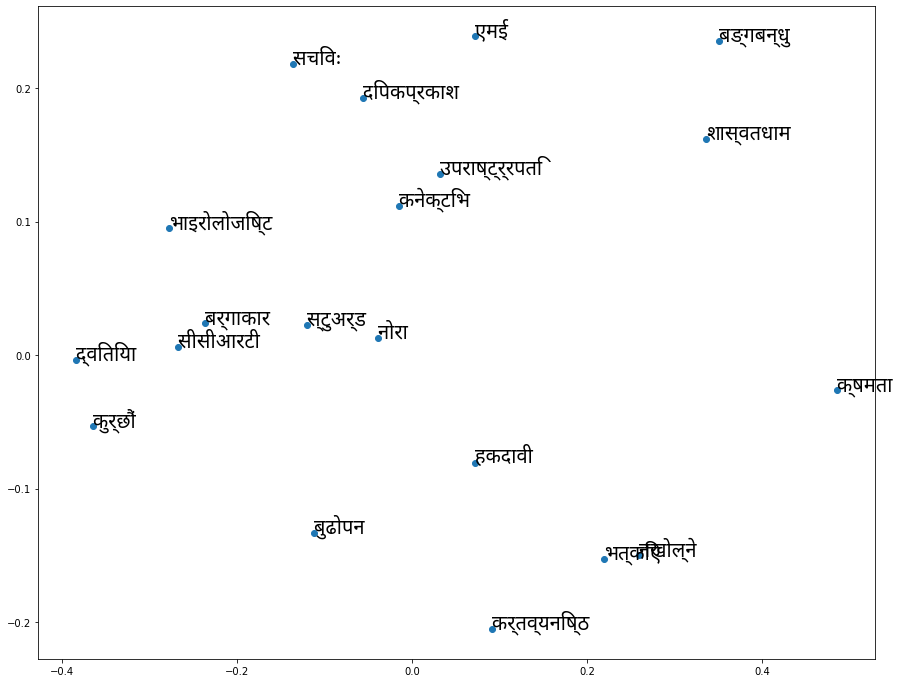

In [22]:
import random
random.seed(12)

n_words_selected = 20

vocab_size = len(model.wv.key_to_index)
keys = list(model.wv.key_to_index.keys())

selected_indices = [random.randrange(vocab_size) for _ in range(n_words_selected)]
# selected_indices = [16, 29, 33, 50, 55, 56, 73, 74, 106, 112, 181, 182, 217, 231, 261, 275, 286, 288, 316, 374, 389, 423, 425, 516, 558, 610, 625]
selected_keys = [keys[x] for x in selected_indices]
print(selected_keys)
# Visualize
pca = PCA(n_components=2)
result = pca.fit_transform(X)
selected_rows = result[selected_indices]

plt.figure(figsize=(15, 12))
prop = fm.FontProperties(fname='/usr/share/fonts/noto/NotoSansDevanagari-Regular.ttf')

for i, word in enumerate(selected_keys):
    plt.annotate(word, xy=(selected_rows[i, 0], selected_rows[i, 1]), fontproperties=prop, fontsize=20)

plt.scatter(selected_rows[:, 0], selected_rows[:, 1])